In [1]:
import csv
import requests
import lxml.html
from bs4 import BeautifulSoup
import pandas as pd
import pandas_profiling as pp
import re

In [2]:
# Load the web page
chairs = []

# Loop through each page as the webpage 
for page in range(0, 496, 16):
    
    url = f'https://www.ashleyfurniture.com/unxsearch/?q=office%20chair&start={str(page)}&sz=16'

    response = requests.get(url)

    page_content = BeautifulSoup(response.text, 'html5lib')
    chair_cards = page_content.find_all('li', class_ = 'grid-tile new-row')


    
    # Loop through each card that contains all the information about that tag
    for chair in chair_cards:
        product_name = chair.find('a', class_ = 'name-link').text
        specs = chair.find('ul', 'detail-row').text
        
        sale_price = chair.find('span', 'sale-price')
        standard_price = chair.find('span', 'product-standard-price')
        
        # handling NoneTypes 
        if sale_price is None:
            sale_price = str(0)
        else:
            sale_price = sale_price.text
       
        
        
        if standard_price is None:
            standard_price = str(0)
        else:
            standard_price = standard_price.text
        
        # create a hash map for the current chair
        chair_data = {
            'name': product_name.strip(),
            'details': specs.strip().replace('\n\n\n', '/'),
            'standard_price': standard_price.strip().split('-')[0].strip(),
            'sale_price': sale_price.strip()
        }
        
        # add the chair to the collection of all the chairs.
        chairs.append(chair_data)
    

In [3]:
# Creates a data frame for all the chairs with the help of pandas and export them to a csv file.
chairs_df = pd.DataFrame(chairs)
#chairs_df.loc[100]

#chairs_df.to_csv('all_chairs_df.csv')

chairs_df.loc[164]

name              OFM Essentials Collection Racing Style Gaming ...
details           Made of plastic, wood and metal with faux leat...
standard_price                                              $329.99
sale_price                                                        0
Name: 164, dtype: object

In [4]:
# Creating a new dataFrame and manipulating prices and turning them into floats and also removing 0's on the price side.
new_chair_df = chairs_df
new_chair_df['standard_price'] = new_chair_df['standard_price'].str.replace(',', '').str.replace('$', '').astype(float)
new_chair_df['sale_price'] = new_chair_df['sale_price'].str.replace(',', '').str.replace('$', '').astype(float)
new_chair_df = new_chair_df[new_chair_df['sale_price'] != 0]
new_chair_df = new_chair_df[new_chair_df['standard_price'] != 0] 

# Adding a new column for the discount 
new_chair_df['price_diff'] = new_chair_df['standard_price'] - new_chair_df['sale_price']

new_chair_df

,name,details,standard_price,sale_price,price_diff
0,Black Swivel Home Office Desk Chair,Faux leather upholstery/Metal and plastic base...,149.99,95.99,54.0
1,Baraga Home Office Desk Chair,Smooth 360-degree swivel/Made of metal/Casters...,319.99,165.99,154.0
2,Hamlyn Home Office Desk Chair,Faux leather upholstery/Made of wood and engin...,369.99,269.99,100.0
3,Baldridge Home Office Desk Chair,Smooth 360-degree swivel/Made of wood/Cushione...,419.99,309.99,110.0
4,Lilu Office Chair,Made of pine wood and engineered wood/Gray was...,454.99,321.99,133.0
...,...,...,...,...,...
180,Barolli Gaming Desk,Engineered wood top with replicated wood grain...,769.99,509.99,260.0
181,"RESPAWN 63"" Gaming Table with Gaming Mouse Pad",Made of metal and PVC/Black/Desk surface cover...,714.99,405.99,309.0
182,Euro Style Axel Adjustable Height Drafting Stool,Made with faux leather/Foam seat and back/Chro...,474.99,354.99,120.0
183,X Rocker Pro Series H4 2.1 Dual Wireless & Blu...,Integrated 2.1 dual audio system with headrest...,469.99,329.99,140.0


In [5]:
# Basic descriptive stats about our data. 
new_chair_df.describe()

,standard_price,sale_price,price_diff
count,174.000000,174.000000,174.000000
mean,383.495747,278.685402,104.810345
std,162.535216,130.285566,62.745414
min,119.990000,71.990000,5.000000
25%,244.990000,169.990000,60.250000
50%,352.490000,245.490000,92.000000
75%,504.990000,391.490000,131.000000
max,1069.990000,794.990000,330.000000


<AxesSubplot:>

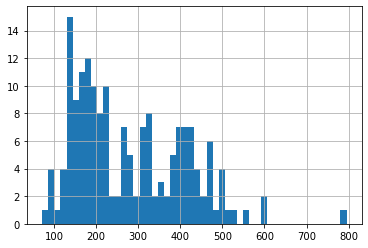

In [6]:
new_chair_df['sale_price'].hist(bins=50)

In [10]:
# Using our price range between 195 the least we should spend and 295 as the most we should spend.
# Also added price discount percentage by column
our_chair_df = new_chair_df
our_chair_df['price_diff_percent'] = (our_chair_df['price_diff'] / our_chair_df['standard_price']) * 100
our_chair_df = our_chair_df[our_chair_df['sale_price'] > 195]
our_chair_df = our_chair_df[our_chair_df['sale_price'] < 295]


our_chair_df.head()

,name,details,standard_price,sale_price,price_diff,price_diff_percent
2,Hamlyn Home Office Desk Chair,Faux leather upholstery/Made of wood and engin...,369.99,269.99,100.0,27.027758
6,OFM Essentials Series Ergonomic Executive Bond...,"Made of plastic, wood and metal with faux leat...",374.99,264.99,110.0,29.334116
7,Button-Tufted Home Office Desk Chair,"Smooth 360-degree swivel/Metal, plastic and wo...",349.99,274.99,75.0,21.429184
11,Draper Office Chair,Made of pine wood and engineered wood with wal...,299.99,219.99,80.0,26.667556
13,Draper Office Chair,Made of pine wood and engineered wood with chr...,299.99,207.99,92.0,30.667689


In [8]:
# sort by discount amount
our_chair_df.sort_values(by=['price_diff'], ascending=False)

,name,details,standard_price,sale_price,price_diff,price_diff_percent
125,Upholstered Office Chair with Metal Base,Made of metal/Blue fabric upholstery over foam...,499.99,218.99,281.0,56.201124
149,OFM Prominent High-Back Task Chair,"Made of plastic, wood and metal with mesh cove...",499.99,286.99,213.0,42.600852
142,OFM Big & Tall Task Chair,"Made of plastic, wood and metal with mesh upho...",469.99,268.99,201.0,42.766867
141,OFM Essentials Collection ESS-6040 Big & Tall ...,"Made of plastic, wood and metal with faux leat...",454.99,262.99,192.0,42.198730
46,Stacy Gray Office Chair,Executive chair with mid-back style/Made with ...,449.99,269.99,180.0,40.000889
28,OFM Core Collection Upholstered Office Chair,"Made of plastic, wood and metal/Gray/Padded se...",394.99,220.99,174.0,44.051748
150,RESPAWN 800 Racing Style Gaming Rocker Chair,"Made of plastic, wood and metal with faux leat...",384.99,219.99,165.0,42.858256
148,OFM Crio High-Back Task Chair,"Made of plastic, wood and metal with mesh upho...",379.99,216.99,163.0,42.895866
167,OFM Fortnite Omega-Xi Gaming Chair with Footrest,"Made of plastic, wood and metal with faux leat...",399.99,245.99,154.0,38.500963
124,Upholstered Swivel Home Office Chair,Made of wood and metal/Gray polyester upholste...,319.99,199.99,120.0,37.501172


In [12]:
# Stats in our price range
our_chair_df.describe()

,standard_price,sale_price,price_diff,price_diff_percent
count,38.000000,38.000000,38.000000,38.000000
mean,348.805789,238.200526,110.605263,30.239933
std,67.688019,29.313919,54.655451,10.006892
min,219.990000,199.990000,20.000000,9.091322
25%,301.240000,215.240000,85.000000,26.766130
50%,339.990000,221.490000,97.000000,29.509164
75%,388.740000,267.990000,120.000000,37.065544
max,499.990000,293.990000,281.000000,56.201124


In [13]:
# more filtering to get our preference
our_chair_df = our_chair_df[our_chair_df['details'].str.contains('metal')]
our_chair_df = our_chair_df[our_chair_df['details'].str.contains('leather')]
our_chair_df = our_chair_df[our_chair_df['details'].str.contains('adjustable')]
our_chair_df

,name,details,standard_price,sale_price,price_diff,price_diff_percent
6,OFM Essentials Series Ergonomic Executive Bond...,"Made of plastic, wood and metal with faux leat...",374.99,264.99,110.0,29.334116
63,Swanson Swivel Adjustable Executive Computer O...,"Made of wood, foam, metal, batting and faux le...",329.99,211.99,118.0,35.758659


In [10]:
our_chair_df.sort_values(by=['price_diff'], ascending=False)
our_chair_df.details[63]

'Made of wood, foam, metal, batting and faux leather/Stone gray faux leather upholstery/360-degree swivel/Gas lift for adjustable seat height/5 casters for easy mobility'